<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import os
import numpy as np

In [6]:
tf.enable_eager_execution()
np.random.seed(0)
tf.set_random_seed(0)

W1123 16:22:12.911273 139895483601728 module_wrapper.py:139] From /tmp/ipykernel_1948620/734876430.py:1: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.

W1123 16:22:12.912590 139895483601728 module_wrapper.py:139] From /tmp/ipykernel_1948620/734876430.py:3: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



Building model

In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER/scDREAMER


In [8]:
#data_path = "/home/ajita/Documents/data_integration/Human_Retina/Human_Retina.h5ad" #Immune_ALL_human
#data_path = "/home/ajita/Documents/data_integration/Immune/Immune_Human_wrong_label_10.h5ad" #Immune_Human_wrong_label_10

data_path = "/home/ajita/Documents/data_integration/Pan/Pancreas.h5ad"

In [9]:
name = "Pancreas"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                }  

W1123 16:22:13.531924 139895483601728 module_wrapper.py:139] From /tmp/ipykernel_1948620/681035364.py:7: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1123 16:22:13.533231 139895483601728 module_wrapper.py:139] From /tmp/ipykernel_1948620/681035364.py:12: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2022-11-23 16:22:13.534848: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-11-23 16:22:13.562690: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2022-11-23 16:22:13.571074: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558a76968350 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-23 16:22:13.571099: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-11-

came in load_gene
updated hvg


W1123 16:22:34.192083 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1123 16:22:34.199826 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:236: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1123 16:22:34.200896 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils.py:18: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1123 16:22:34.201950 139895483601728 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflo

here [8 8 8 ... 8 8 8]
Shape self.data_train: (16382, 2000)
Shape self.data_test: (16382, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2009), dtype=float32)


W1123 16:22:34.423154 139895483601728 deprecation.py:506] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:265: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1123 16:22:34.510774 139895483601728 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:42: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1123 16:22:34.512344 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:519: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W1123 16:22:34.656102 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAM

decoder input shape  Tensor("concat_2:0", shape=(?, 19), dtype=float32)
KL gaussian z Tensor("mul_9:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_8:0", shape=(?,), dtype=float32)


W1123 16:22:34.732335 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:115: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.

W1123 16:22:34.733241 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:124: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W1123 16:22:34.757490 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:131: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1123 16:22:34.779085 139895483601728 deprecation.py:323] From /home/ajita/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updatin

Cluster DRA on DataSet /home/ajita/Documents/data_integration/Pan/Pancreas.h5ad ... 


W1123 16:22:36.153078 139895483601728 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:143: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Epoch : [0] ,  a_loss = 688.9423, d_loss: -0.0031
Epoch : [1] ,  a_loss = 499.3554, d_loss: -0.0056
Epoch : [2] ,  a_loss = 706.4110, d_loss: -0.0026
Epoch : [3] ,  a_loss = 634.9620, d_loss: -0.0036
Epoch : [4] ,  a_loss = 596.9302, d_loss: -0.0035
Epoch : [5] ,  a_loss = 452.3355, d_loss: -0.0067
Epoch : [6] ,  a_loss = 391.0509, d_loss: -0.0429
Epoch : [7] ,  a_loss = 659.0856, d_loss: 0.0260
Epoch : [8] ,  a_loss = 368.4005, d_loss: -0.0998
Epoch : [9] ,  a_loss = 588.2009, d_loss: -0.0025
Epoch : [10] ,  a_loss = 648.9501, d_loss: -0.0044
Epoch : [11] ,  a_loss = 603.3090, d_loss: -0.0024
Epoch : [12] ,  a_loss = 494.0054, d_loss: -0.0067
Epoch : [13] ,  a_loss = 595.7189, d_loss: -0.0026
Epoch : [14] ,  a_loss = 413.0970, d_loss: -0.0263
Epoch : [15] ,  a_loss = 548.0791, d_loss: -0.0064
Epoch : [16] ,  a_loss = 407.5394, d_loss: -0.0205
Epoch : [17] ,  a_loss = 644.4095, d_loss: -0.0029
Epoch : [18] ,  a_loss = 389.3834, d_loss: -0.1602
Epoch : [19] ,  a_loss = 592.2565, d_loss:

Epoch : [160] ,  a_loss = 345.4612, d_loss: -0.2731
Epoch : [161] ,  a_loss = 330.5993, d_loss: -0.5187
Epoch : [162] ,  a_loss = 340.0252, d_loss: -0.5094
Epoch : [163] ,  a_loss = 372.3190, d_loss: -0.5318
Epoch : [164] ,  a_loss = 399.4564, d_loss: -0.5902
Epoch : [165] ,  a_loss = 459.6349, d_loss: -0.7763
Epoch : [166] ,  a_loss = 522.2732, d_loss: -0.5921
Epoch : [167] ,  a_loss = 347.1345, d_loss: -0.8088
Epoch : [168] ,  a_loss = 409.7936, d_loss: -0.8499
Epoch : [169] ,  a_loss = 485.4335, d_loss: -0.6204
Epoch : [170] ,  a_loss = 428.5396, d_loss: -0.7178
Epoch : [171] ,  a_loss = 353.2954, d_loss: -0.6201
Epoch : [172] ,  a_loss = 317.6866, d_loss: -0.5667
Epoch : [173] ,  a_loss = 484.3512, d_loss: -0.5873
Epoch : [174] ,  a_loss = 330.8283, d_loss: -0.6343
Epoch : [175] ,  a_loss = 361.1974, d_loss: -0.7280
Epoch : [176] ,  a_loss = 354.6557, d_loss: -0.3572
Epoch : [177] ,  a_loss = 508.7696, d_loss: -0.3499
Epoch : [178] ,  a_loss = 501.0868, d_loss: -0.5490
Epoch : [179

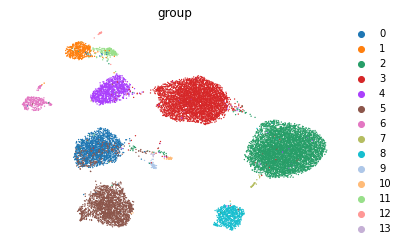

None


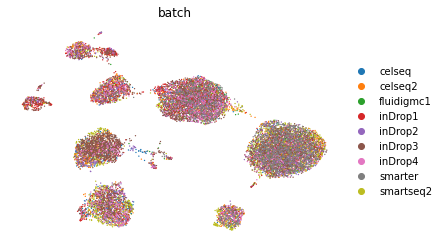

None
Computing NMI ...
Done !
NMI = 0.7628189083513047


In [10]:
import model
#import model_wo_Dis as model# without Discriminator
#import model_wo_BC as model # without Batch Classiifer

#import model_scanvi as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()

